# Baselines

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adversarial_attacks import compute_psr_db_linf, compute_psr_db_l2

## Baseline Results

### Load Results

In [2]:
# Load cnn and glrt results
fgsm_inf = pd.read_csv('../results/improved_attacks/fgsm_inf_accuracy.csv')
pgd_inf = pd.read_csv('../results/improved_attacks/pgd_inf_accuracy.csv')
fgsm_l2 = pd.read_csv('../results/improved_attacks/fgsm_l2_accuracy.csv')
pgd_l2 = pd.read_csv('../results/improved_attacks/pgd_l2_accuracy.csv')

In [3]:
# Load baseline results
adv_df_fgsm_inf = pd.read_csv('../results/baseline/fgsm_inf_accuracy_with_adv.csv')
distill_df_fgsm_inf = pd.read_csv('../results/baseline/fgsm_inf_accuracy_with_distill.csv')
dae_df_fgsm_inf = pd.read_csv('../results/baseline/fgsm_inf_accuracy_with_dae.csv')
adv_df_fgsm_l2 = pd.read_csv('../results/baseline/fgsm_l2_accuracy_with_adv.csv')
distill_df_fgsm_l2 = pd.read_csv('../results/baseline/fgsm_l2_accuracy_with_distill.csv')
dae_df_fgsm_l2 = pd.read_csv('../results/baseline/fgsm_l2_accuracy_with_dae.csv')
adv_df_pgd_inf = pd.read_csv('../results/baseline/pgd_inf_accuracy_with_adv.csv')
distill_df_pgd_inf = pd.read_csv('../results/baseline/pgd_inf_accuracy_with_distill.csv')
dae_df_pgd_inf = pd.read_csv('../results/baseline/pgd_inf_accuracy_with_dae.csv')
adv_df_pgd_l2 = pd.read_csv('../results/baseline/pgd_l2_accuracy_with_adv.csv')
distill_df_pgd_l2 = pd.read_csv('../results/baseline/pgd_l2_accuracy_with_distill.csv')
dae_df_pgd_l2 = pd.read_csv('../results/baseline/pgd_l2_accuracy_with_dae.csv')

### Convert X-axis to PSR dB

In [4]:
epsilon_values_inf = np.linspace(0.0, 0.005, 20)[1:] # Exclude 0.0 to avoid division by zero
epsilon_values_l2 = np.linspace(0.0, 0.15, 20)[1:] # Exclude 0.0 to avoid division by zero

In [5]:
psr_db_linf = compute_psr_db_linf(epsilon_values_inf, num_features=8000)
psr_db_linf = np.insert(psr_db_linf, 0, -np.inf)
psr_db_l2 = compute_psr_db_l2(epsilon_values_l2)
psr_db_l2 = np.insert(psr_db_l2, 0, -np.inf)

### FGSM - L inf

In [6]:
# Merge new columns into fgsm_inf based on epsilon
fgsm_inf['psr_db'] = psr_db_linf
fgsm_inf['adv_trained'] = adv_df_fgsm_inf['adv_trained']
fgsm_inf['distill_trained'] = distill_df_fgsm_inf['distill_trained']
fgsm_inf['dae_trained'] = dae_df_fgsm_inf['dae_trained']

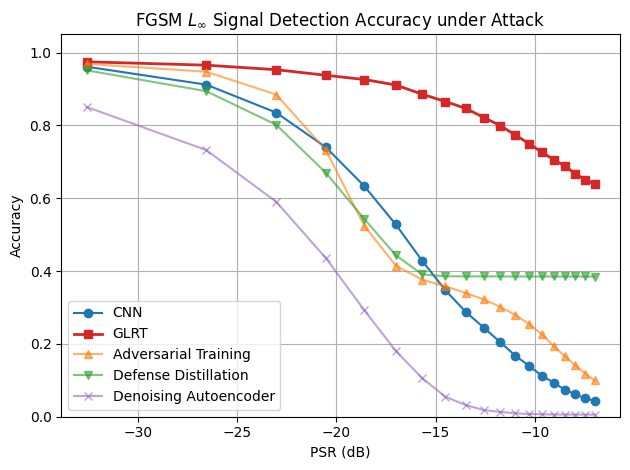

In [7]:
# Plot
plt.figure()
plt.plot(fgsm_inf['psr_db'], fgsm_inf['cnn_accuracy'], label='CNN', marker='o', color='C0')
plt.plot(fgsm_inf['psr_db'], fgsm_inf['glrt_accuracy'], label='GLRT', marker='s', color='C3', linewidth=2)
plt.plot(fgsm_inf['psr_db'], fgsm_inf['adv_trained'], label='Adversarial Training', marker='^', color='C1', alpha=0.6)
plt.plot(fgsm_inf['psr_db'], fgsm_inf['distill_trained'], label='Defense Distillation', marker='v', color='C2', alpha=0.6)
plt.plot(fgsm_inf['psr_db'], fgsm_inf['dae_trained'], label='Denoising Autoencoder', marker='x', color='C4', alpha=0.6)

plt.title('FGSM $L_\infty$ Signal Detection Accuracy under Attack')
plt.xlabel('PSR (dB)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### FGSM - L2

In [8]:
# Merge new columns into fgsm_l2 based on epsilon
fgsm_l2['psr_db'] = psr_db_l2
fgsm_l2['adv_trained'] = adv_df_fgsm_l2['adv_trained']
fgsm_l2['distill_trained'] = distill_df_fgsm_l2['distill_trained']
fgsm_l2['dae_trained'] = dae_df_fgsm_l2['dae_trained']

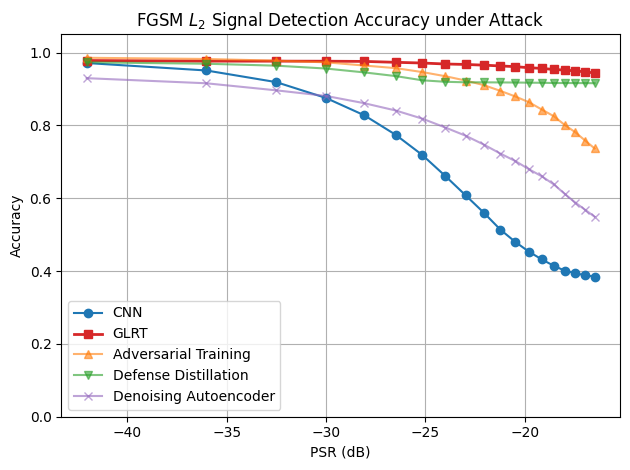

In [9]:
# Plot
plt.figure()
plt.plot(fgsm_l2['psr_db'], fgsm_l2['cnn_accuracy'], label='CNN', marker='o', color='C0')
plt.plot(fgsm_l2['psr_db'], fgsm_l2['glrt_accuracy'], label='GLRT', marker='s', color='C3', linewidth=2)
plt.plot(fgsm_l2['psr_db'], fgsm_l2['adv_trained'], label='Adversarial Training', marker='^', color='C1', alpha=0.6)
plt.plot(fgsm_l2['psr_db'], fgsm_l2['distill_trained'], label='Defense Distillation', marker='v', color='C2', alpha=0.6)
plt.plot(fgsm_l2['psr_db'], fgsm_l2['dae_trained'], label='Denoising Autoencoder', marker='x', color='C4', alpha=0.6)

plt.title('FGSM $L_2$ Signal Detection Accuracy under Attack')
plt.xlabel('PSR (dB)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PGD - L inf

In [10]:
# Merge new columns into pgd_inf based on epsilon
pgd_inf['psr_db'] = psr_db_linf
pgd_inf['adv_trained'] = adv_df_pgd_inf['adv_trained']
pgd_inf['distill_trained'] = distill_df_pgd_inf['distill_trained']
pgd_inf['dae_trained'] = dae_df_pgd_inf['dae_trained']

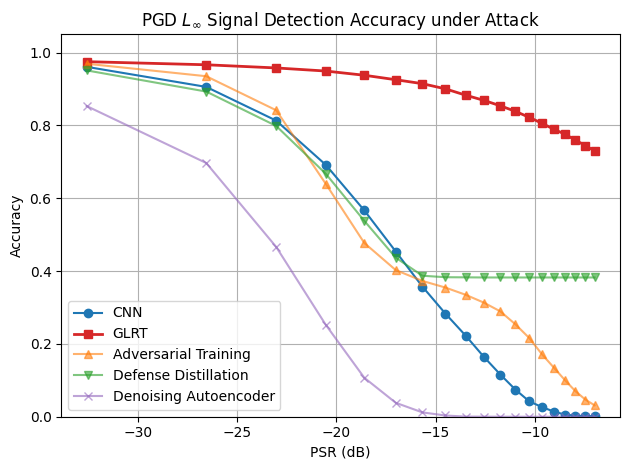

In [11]:
# Plot
plt.figure()
plt.plot(pgd_inf['psr_db'], pgd_inf['cnn_accuracy'], label='CNN', marker='o', color='C0')
plt.plot(pgd_inf['psr_db'], pgd_inf['glrt_accuracy'], label='GLRT', marker='s', color='C3', linewidth=2)
plt.plot(pgd_inf['psr_db'], pgd_inf['adv_trained'], label='Adversarial Training', marker='^', color='C1', alpha=0.6)
plt.plot(pgd_inf['psr_db'], pgd_inf['distill_trained'], label='Defense Distillation', marker='v', color='C2', alpha=0.6)
plt.plot(pgd_inf['psr_db'], pgd_inf['dae_trained'], label='Denoising Autoencoder', marker='x', color='C4', alpha=0.6)

plt.title('PGD $L_\infty$ Signal Detection Accuracy under Attack')
plt.xlabel('PSR (dB)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### PGD - L2

In [12]:
# Merge new columns into pgd_l2 based on epsilon
pgd_l2['psr_db'] = psr_db_l2
pgd_l2['adv_trained'] = adv_df_pgd_l2['adv_trained']
pgd_l2['distill_trained'] = distill_df_pgd_l2['distill_trained']
pgd_l2['dae_trained'] = dae_df_pgd_l2['dae_trained']

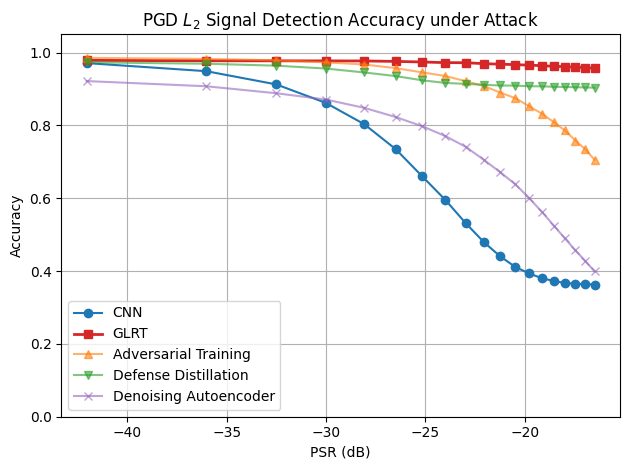

In [13]:
# Plot
plt.figure()
plt.plot(pgd_l2['psr_db'], pgd_l2['cnn_accuracy'], label='CNN', marker='o', color='C0')
plt.plot(pgd_l2['psr_db'], pgd_l2['glrt_accuracy'], label='GLRT', marker='s', color='C3', linewidth=2)
plt.plot(pgd_l2['psr_db'], pgd_l2['adv_trained'], label='Adversarial Training', marker='^', color='C1', alpha=0.6)
plt.plot(pgd_l2['psr_db'], pgd_l2['distill_trained'], label='Defense Distillation', marker='v', color='C2', alpha=0.6)
plt.plot(pgd_l2['psr_db'], pgd_l2['dae_trained'], label='Denoising Autoencoder', marker='x', color='C4', alpha=0.6)

plt.title('PGD $L_2$ Signal Detection Accuracy under Attack')
plt.xlabel('PSR (dB)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Saving
# plt.savefig("plot.pdf", bbox_inches='tight') for better quality